In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.svm import SVC 

from src.models.detect_model import Face_Detection
from src.models.recognize_model import Face_Recognition, load_model, save_model

In [2]:
X, y = Face_Recognition()._get_data_from_db("face_database")

In [3]:
X

array([[0.14094621, 0.09701493, 0.07152915, 0.05223881, 0.04181921,
        0.0495635 , 0.06547451, 0.11813574, 0.17164179, 0.19163616],
       [0.09204198, 0.06165282, 0.06569742, 0.06012243, 0.05673371,
        0.060669  , 0.07706603, 0.1367512 , 0.19807608, 0.19118933],
       [0.10146307, 0.07232069, 0.06780064, 0.05590579, 0.05281313,
        0.06292375, 0.07398596, 0.12465802, 0.19019864, 0.1979303 ],
       [0.08975377, 0.05628049, 0.06002496, 0.05446499, 0.04924543,
        0.06320209, 0.07965506, 0.13230455, 0.19822989, 0.21683876],
       [0.05115415, 0.04342723, 0.04685055, 0.04450313, 0.03853678,
        0.04890454, 0.07316119, 0.14769171, 0.25518388, 0.25058685],
       [0.03159478, 0.02181545, 0.02724841, 0.03786359, 0.04722501,
        0.06678368, 0.09720829, 0.176446  , 0.25150451, 0.24231026],
       [0.18901202, 0.12439519, 0.06602154, 0.05072577, 0.04885282,
        0.05665678, 0.07741533, 0.09848603, 0.12096145, 0.16747308],
       [0.0940345 , 0.07307139, 0.0506708

In [4]:
m = SVC(kernel='linear', probability=True)
m.fit(X, y)

SVC(kernel='linear', probability=True)

In [5]:
io = [[0.09204198, 0.06165282, 0.06569742, 0.06012243, 0.05673371,
        0.060669  , 0.07706603, 0.1367512 , 0.19807608, 0.19118933]]

In [6]:
re = m.predict_proba(io)

In [7]:
np.max(re)

0.24397912672594424

In [8]:
face_detec = Face_Detection()
face_recog = Face_Recognition()

In [15]:
img = cv2.imread("Test img/Narendra_Modi03.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [10]:
face_recog.fit_model("face_database")

In [16]:
faces = face_detec.detectMultiScale(gray_img)
re = face_recog.recognize(gray_img, faces)

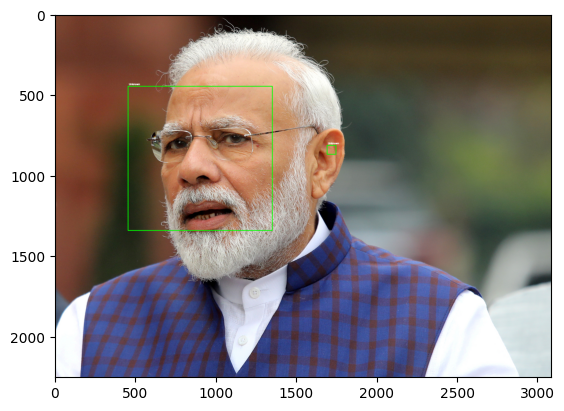

In [19]:

for (x1, y1, x2, y2, name) in re:
    cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 3)
    cv2.putText(img, name, (x1 + 5, y1 - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
plt.imshow(img[:,:,::-1])

In [13]:
# import cv2
# from ultralytics import YOLO
# import os
# import torch
# import matplotlib.pyplot as plt


# def save_image(fr, dest):
#     device = torch.device('cpu')
#     model = YOLO("yolov8n-face.pt").to(device)

#     names = os.listdir(path=fr)
#     for name in names:
#         imgs = os.listdir(f"{fr}/{name}")
#         os.makedirs(f"{dest}/{name}")
#         for img in imgs:
#             _img = cv2.imread(f"{fr}/{name}/{img}")
#             face = model(_img)
            
#             for result in face:
#                 for box in result.boxes.data:
#                     x1, y1, x2, y2, score, class_id = box.cpu().numpy()
#                     x1, y1, x2, y2 = (int(x1), int(y1), int(x2), int(y2))
#                     _img = cv2.resize(_img[y1:y2, x1:x2], (128, 128))

#                     cv2.imwrite(img=_img, filename=f"D:/Recognition + Tracking/{dest}/{name}/{img}")

# save_image("Database", "face_database")